In [1]:
from pylab import *

In [64]:
def Mat_A_inv(Nx,Ny,r):
    # Ojo Nx,Ny se refiere a los pintos interiores
    N_tot = Nx*Ny
    A = zeros( (N_tot,N_tot) )
    dd , m_r= 1+4*r , -r
    # Psi_ij -> i renglones o y, j columnas o x
    for i in range(Ny-1):
        for j in range(Nx-1):
            A[Ny*i+j,Ny*i+j] = dd
            A[Ny*i+j,Ny*i+j+1] = m_r
            A[Ny*i+j+1,Ny*i+j] = m_r
            A[Ny*i+j,Ny*(i+1)+j] = m_r
            A[Ny*(i+1)+j,Ny*i+j] = m_r
    for j in range(Nx-1):
        A[Ny*(Ny-1)+j,Ny*(Ny-1)+j] = dd
        A[Ny*(Ny-1)+j,Ny*(Ny-1)+j+1] = m_r
        A[Ny*(Ny-1)+j+1,Ny*(Ny-1)+j] = m_r
    for i in range(Ny-1):
        A[Ny*i+Nx-1,Ny*i+Nx-1] = dd
        A[Ny*i+Nx-1,Ny*(i+1)+Nx-1] = m_r
        A[Ny*(i+1)+Nx-1,Ny*i+Nx-1] = m_r
    A[Ny*(Ny-1)+Nx-1,Ny*(Ny-1)+Nx-1] = dd
    A_inv = inv(A)
    return A_inv

def Mat_B(Nx,Ny,r):
    # Ojo Nx,Ny se refiere a los pintos interiores
    N_tot = Nx*Ny
    A = zeros( (N_tot,N_tot) )
    dd = 1-4*r 
    # Psi_ij -> i renglones o y, j columnas o x
    for i in range(Ny-1):
        for j in range(Nx-1):
            A[Ny*i+j,Ny*i+j] = dd
            A[Ny*i+j,Ny*i+j+1] = r
            A[Ny*i+j+1,Ny*i+j] = r
            A[Ny*i+j,Ny*(i+1)+j] = r
            A[Ny*(i+1)+j,Ny*i+j] = r
    for j in range(Nx-1):
        A[Ny*(Ny-1)+j,Ny*(Ny-1)+j] = dd
        A[Ny*(Ny-1)+j,Ny*(Ny-1)+j+1] = r
        A[Ny*(Ny-1)+j+1,Ny*(Ny-1)+j] = r
    for i in range(Ny-1):
        A[Ny*i+Nx-1,Ny*i+Nx-1] = dd
        A[Ny*i+Nx-1,Ny*(i+1)+Nx-1] = r
        A[Ny*(i+1)+Nx-1,Ny*i+Nx-1] = r
    A[Ny*(Ny-1)+Nx-1,Ny*(Ny-1)+Nx-1] = dd
    return A

In [74]:
A_inv = Mat_A_inv(3,3,1)
B = Mat_B(3,3,1)

In [86]:
Psi_tilde_vec = arange(1,17,1)
Psi_tilde_vec

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [87]:
Psi_tilde_cuad = Mat.reshape(4,4)
Psi_tilde_cuad

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [88]:
Psi_tilde_vec.reshape(1,16)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]])

In [98]:
Psi = zeros((6,6))
Psi

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [99]:
Psi[1:-1,1:-1] = Psi_tilde_cuad
Psi

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  2.,  3.,  4.,  0.],
       [ 0.,  5.,  6.,  7.,  8.,  0.],
       [ 0.,  9., 10., 11., 12.,  0.],
       [ 0., 13., 14., 15., 16.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [100]:
Psi[1:-1,1:-1].reshape(1,16)

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16.]])

In [134]:
def Psi_interior(Psi):
    Ny,Nx = Psi.shape
    Nx_int , Ny_int = Nx-2 , Ny-2
    Psi_vec = Psi[1:-1,1:-1].reshape(1,Nx_int*Ny_int)
    return Nx_int,Ny_int,Psi_vec[0]

In [135]:
Psi_interior(Psi)

(4,
 4,
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16.]))

In [136]:
def cond_ini(x,y):
    Nx_tot , Ny_tot = len(x),len(y)
    Psi_ini = zeros( (Ny_tot,Nx_tot))
    for i in range(Nx_tot):
        for j in range(Ny_tot):
            if sqrt((x[i]-0.25)**2 + (y[j]-0.25)**2) < 0.1:
                Psi_ini[j,i] = 1
            if sqrt((x[i]-0.75)**2 + (y[j]-0.75)**2) < 0.15:
                Psi_ini[j,i] = 1
    return Psi_ini

In [137]:
x , y = linspace(0,1,100) , linspace(0,1,100)
Psi_ini = cond_ini(x,y)

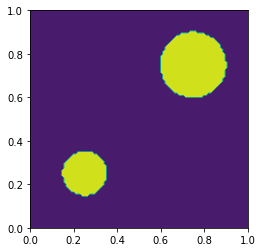

In [138]:
XX,YY = meshgrid(x,y)
contourf(XX,YY,Psi_ini)
gca().set_aspect('equal')
show()

In [143]:
Nx,Ny,Psi_ini_interior = Psi_interior(Psi_ini)

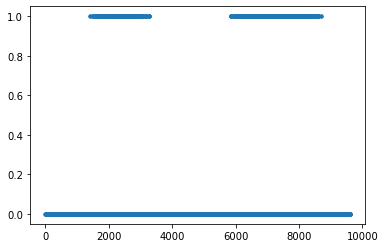

In [144]:
plot(Psi_ini_interior,'.')
show()